# Convert raw stations csv to coordinates shapefile

#### Import libraries

In [149]:
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import contextily as ctx

#### Read csv file

In [150]:
# Read csv
stations = pd.read_csv("stations_data/stations.csv", sep=";")

# Split column coordinate to lat and lon columns

# Save coordinates to new dataframe and split with ","
Coordinates = stations["Coordinate"].str.split(",", n = 0, expand = True)

# Remove whitespace from new dataframe
Coordinates[0] = Coordinates[0].str.strip()
Coordinates[1] = Coordinates[1].str.strip()

# Remove "," from new dataframe
Coordinates[0] = Coordinates[0].replace('\,','')
Coordinates[1] = Coordinates[1].replace('\,','')

# Save cleaned coordinates back to dataframe
stations["Latitude"] = Coordinates[0]
stations["Longitude"] = Coordinates[1]

# Drop old column coordinate
stations = stations.drop(['Coordinate'], axis=1)

# Conver columns Longitude and Latitude to integer
stations["Longitude"] = stations["Longitude"].astype(float)
stations["Latitude"] = stations["Latitude"].astype(float)

# Drop stations which are outside of area we are interested in

# Sort values by longitude/latitude to find furthest stations
stations.sort_values(by=['Longitude'])

# Drop unwanted stations
stations = stations[stations["Name"] != "Jokela"]
stations = stations[stations["Name"] != "Kirkkonummi"]
stations = stations[stations["Name"] != "Tolsa"]
stations = stations[stations["Name"] != "Jorvas"]
stations = stations[stations["Name"] != "Masala"]

# Show cleaned dataframe stations
stations.head(5)

,Name,Opened,Type,Latitude,Longitude
0,Espoo,1903,Train,60.205465,24.656821
1,Helsinki Center Station,1862,Train/Metro,60.170942,24.941281
2,Hiekkaharju,1931,Train,60.303117,25.049406
3,Huopalahti,1910,Train,60.218033,24.895245
4,Ilmala,1967,Train,60.207560,24.921327


#### Convert pandas dataframe to geodataframe

In [151]:
# Convert to geodataframe
stations = gpd.GeoDataFrame(stations, geometry=gpd.points_from_xy(stations["Longitude"], stations["Latitude"]))

# Drop columns Longitude and latitude
stations = stations.drop(['Longitude', 'Latitude'], axis=1)

# Initalice coordinate reference system
stations.crs = CRS.from_epsg(4326).to_wkt()

# Set CRS to EPSG:3857
stations = stations.to_crs(epsg=3857)

# Show first rows
stations.head(5)

,Name,Opened,Type,geometry
0,Espoo,1903,Train,POINT (2744784.758 8445625.162)
1,Helsinki Center Station,1862,Train/Metro,POINT (2776450.701 8437894.974)
2,Hiekkaharju,1931,Train,POINT (2788487.121 8467534.963)
3,Huopalahti,1910,Train,POINT (2771325.997 8448441.335)
4,Ilmala,1967,Train,POINT (2774229.432 8446094.524)


#### Visualize stations on map to check they are on correct place

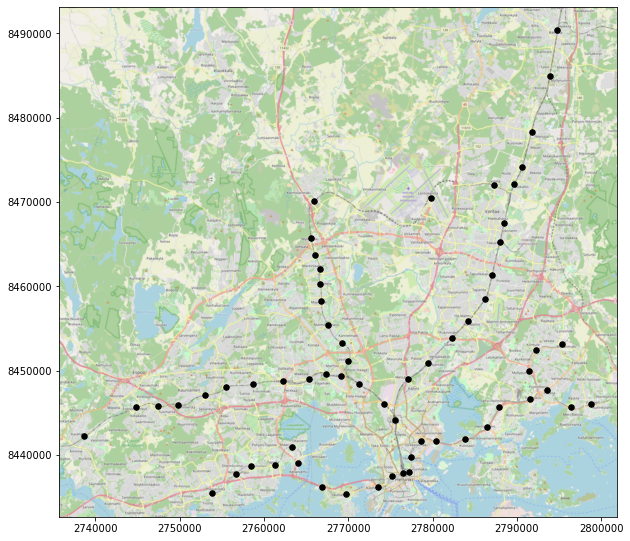

In [152]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(10,10))

# Plot stations
stations.plot(ax=ax, color="black", markersize=30)

# Add basemap with `OMS_A` style
ctx.add_basemap(ax, url=ctx.tile_providers.OSM_A)

#### Save cleaned stations geodataframe as shapefile

In [153]:
# Set filename and path
outfp = "stations_data/stations.shp"

# Savefile
stations.to_file(outfp)